In [42]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [43]:
df = pd.read_csv('reduced_data.csv')

In [44]:
df.head()

,ch1_delta_power,ch1_delta_entropy,ch1_delta_skewness,ch1_theta_power,ch1_theta_entropy,ch1_theta_skewness,ch1_alpha_power,ch1_alpha_entropy,ch1_alpha_skewness,ch1_beta_power,...,ch23_std,ch23_kurtosis,ch23_ptp,ch23_var,ch23_max,ch23_min,ch23_argmax,ch23_argmin,ch23_rms,target
0,3.956675e-10,7.242834,1.225086,3.008743e-10,7.376720,0.058185,5.412620e-11,7.562993,-0.706714,8.335448e-11,...,0.000011,1.081940,0.000087,1.240582e-10,-0.000048,0.000040,4259,3555,0.000011,0
1,7.738383e-10,7.451562,-0.371714,1.088606e-09,7.643583,-0.014556,9.561639e-10,7.819361,0.073699,7.457113e-10,...,0.000027,7.460651,0.000362,7.519351e-10,-0.000249,0.000113,299,457,0.000027,0
2,3.205693e-11,7.737866,0.255901,3.220042e-11,7.713914,-0.155246,1.735705e-11,7.685807,0.257462,4.116156e-11,...,0.000006,0.373968,0.000042,3.889933e-11,-0.000024,0.000019,2723,2444,0.000006,0
3,1.048938e-09,7.140633,1.328580,5.780207e-10,7.747784,0.266691,6.165442e-10,7.822946,-0.173683,6.483178e-10,...,0.000038,6.950893,0.000559,1.442051e-09,-0.000349,0.000210,2045,2050,0.000038,0
4,1.225959e-08,7.647742,0.221012,2.023000e-08,7.697598,0.158476,6.665467e-09,7.695178,0.218040,1.326436e-08,...,0.000066,0.502647,0.000401,4.342763e-09,-0.000171,0.000230,3837,4248,0.000066,0


In [45]:
df.var()

ch1_delta_power       8.541202e-17
ch1_delta_entropy     1.690603e-01
ch1_delta_skewness    6.275140e-01
ch1_theta_power       1.504816e-16
ch1_theta_entropy     1.167855e-01
                          ...     
ch23_min              5.802276e-08
ch23_argmax           2.484984e+06
ch23_argmin           2.756492e+06
ch23_rms              3.946340e-09
target                2.509653e-01
Length: 507, dtype: float64

In [46]:
df.isna().sum()

ch1_delta_power       0
ch1_delta_entropy     0
ch1_delta_skewness    0
ch1_theta_power       0
ch1_theta_entropy     0
                     ..
ch23_min              0
ch23_argmax           0
ch23_argmin           0
ch23_rms              0
target                0
Length: 507, dtype: int64

In [47]:
x= df.drop(['target'],axis=1)
y= df['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'MSE')

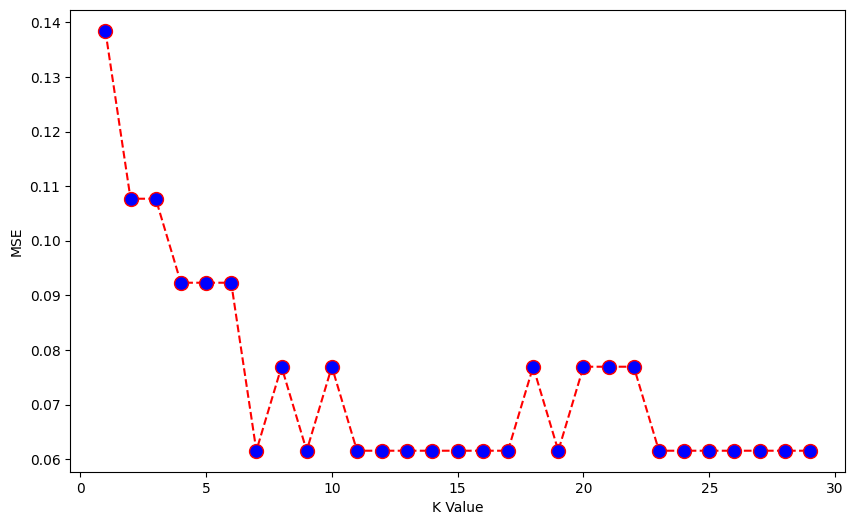

In [49]:
from sklearn.metrics import mean_squared_error
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred= knn.predict(X_test)
    error.append(mean_squared_error(y_test,pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('MSE')

In [65]:
knn= KNeighborsClassifier(n_neighbors=2)  
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=15)

In [66]:
knn.score(X_test,y_test)

0.9384615384615385

In [67]:
knn.score(X_train,y_train)

0.8717948717948718

Text(0, 0.5, 'Accuary')

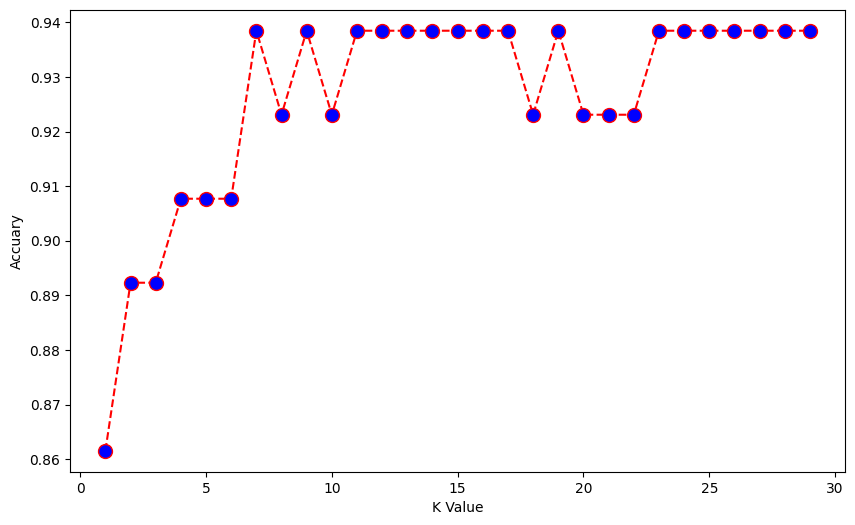

In [68]:
scores = []
# Calculating accuary for K values between 1 and 30
for i in range(1, 30):
    knn2= KNeighborsClassifier(n_neighbors=i)  
    knn2.fit(X_train, y_train) 
    score = knn2.score(X_test,y_test)
    scores.append((score))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuary')

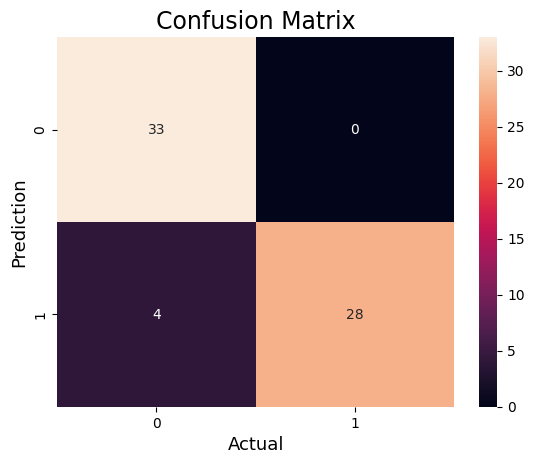

In [69]:
from sklearn.metrics import confusion_matrix  
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test, y_pred)  
#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [70]:
precision = precision_score(y_test, y_pred)
precision

1.0

In [71]:
sensitivity = recall_score(y_test, y_pred)
sensitivity

0.875

In [72]:
# Extract true negative and false positive values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
specificity

1.0